# Project - Word Cloud

This project to create a "word cloud" from a text by writing a script.  This script will process the text, remove punctuation, ignore case and words that do not contain all alphabets, count the frequencies, and ignore uninteresting or irrelevant words.  A dictionary is the output of the `calculate_frequencies` function.  The `wordcloud` module will then generate the image from the dictionary.

For the input text of your script need a file that contains text only.  For the text itself can be copy and paste the contents of a website like. Or you can choose EBook and see what word clouds you can get from famous books, like a Shakespeare play or a novel by Jane Austen. Save this as a .txt file somewhere on your computer.
<br><br>
Need to upload the input file here so that the script will be able to process it.  To do the upload, need an uploader widget.  The following cell can perform all the installs and imports for the word cloud script and uploader widget.  It may take a minute for all of this to run.
<br><br>
**Enabling notebook extension fileupload/extension...**
<br>
**- Validating: <font color =green>OK</font>**

In [1]:
# Installs and imports

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Installing /opt/conda/lib/python3.6/site-packages/fileupload/static -> fileupload
Up to date: /home/jovyan/.local/share/jupyter/nbextensions/fileupload/extension.js
Up to date: /home/jovyan/.local/share/jupyter/nbextensions/fileupload/widget.js
Up to date: /home/jovyan/.local/share/jupyter/nbextensions/fileupload/fileupload/widget.js
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: OK



To upload the text file, run the following cell that contains all the code for a custom uploader widget. Once you run this cell, a "Browse" button should appear below it. Click this button and navigate the window to locate your saved text file.

In [2]:
# Uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget .observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `h.txt` (68.70 kB)


The uploader widget saved the contents of the uploaded file into a string object named *file_contents* that the word cloud script can process. 

In [5]:

def calculate_frequencies(file_contents):
    # punctuations and uninteresting words
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # MAIN CODE START HERE
    
    result={}
    for x in file_contents.lower(): 
        if x in punctuations: 
            file_contents = file_contents.replace(x, "")
            
    words=file_contents.split()
    for word in words:
        if word in uninteresting_words:
            word.replace(word,"")
        else:
            if word not in result.keys():
                result[word]=0
            else:
                result[word]+=1
    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(result)
    return cloud.to_array()

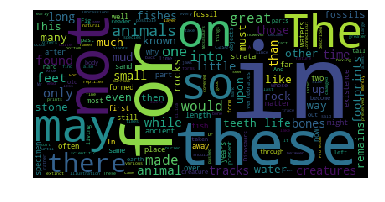

In [7]:
# Display wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()